Diseñar una Muestra para Simular el Control del Funcionamiento de Sistemas
Objetivos:

Evaluar distintos sistemas: cadena logística, centro de producción, nivel de servicio de entregas, satisfacción del cliente.
Considerar niveles de confianza y precisión, y el costo en tiempo y dinero.
Métodos:

Muestra Aleatoria Simple (M.A.S.):
Seleccionar datos de manera aleatoria para representar la población.
Parte 1: Intervalos de Confianza

Cálculo de Intervalos de Confianza:
Seleccionar un nivel de confianza (ej., 95%).
Calcular la media y la desviación estándar de la muestra.
Usar la fórmula del intervalo de confianza:

 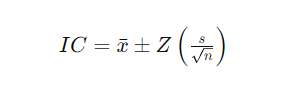
 Donde:
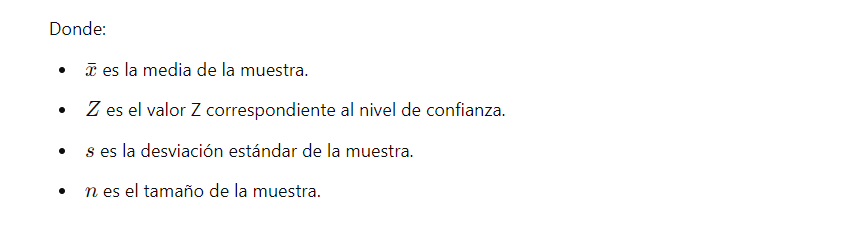
}




In [9]:
import numpy as np
import random

# Generar datos simulados
poblacion = np.random.randint(60, 100, size=1000)
muestra = random.sample(list(poblacion), 300)

# Calcular media y desviación estándar de la muestra
media_muestra = np.mean(muestra)
desviacion_estandar_muestra = np.std(muestra, ddof=1)
n = len(muestra)


In [10]:
import scipy.stats as stats

nivel_confianza = 0.95
z = stats.norm.ppf(1 - (1 - nivel_confianza) / 2)
error_margen = z * (desviacion_estandar_muestra / np.sqrt(n))
intervalo_confianza = (media_muestra - error_margen, media_muestra + error_margen)

intervalo_confianza



(78.53075796940264, 81.08924203059736)

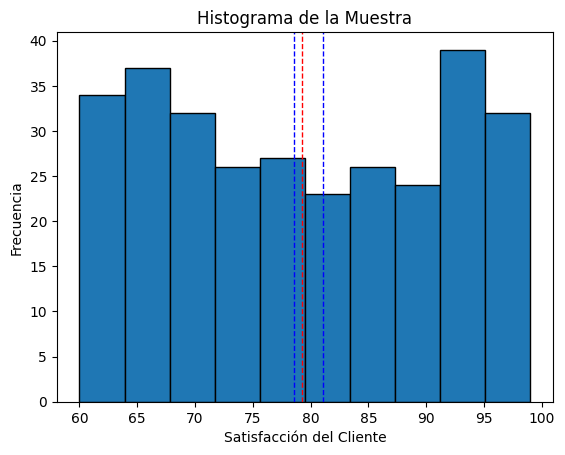

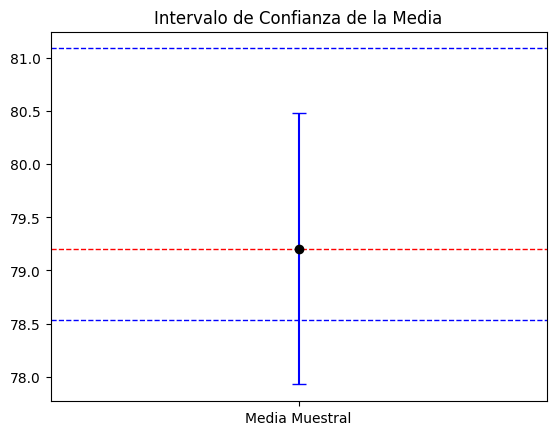

In [16]:
import matplotlib.pyplot as plt

# Histograma de la muestra
plt.hist(muestra, bins=10, edgecolor='black')
plt.axvline(media_muestra, color='red', linestyle='dashed', linewidth=1)
plt.axvline(intervalo_confianza[0], color='blue', linestyle='dashed', linewidth=1)
plt.axvline(intervalo_confianza[1], color='blue', linestyle='dashed', linewidth=1)
plt.title('Histograma de la Muestra')
plt.xlabel('Satisfacción del Cliente')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de Intervalo de Confianza
fig, ax = plt.subplots()
ax.errorbar(1, media_muestra, yerr=error_margen, fmt='o', color='black', ecolor='blue', capsize=5)
ax.axhline(media_muestra, color='red', linestyle='dashed', linewidth=1)
ax.axhline(intervalo_confianza[0], color='blue', linestyle='dashed', linewidth=1)
ax.axhline(intervalo_confianza[1], color='blue', linestyle='dashed', linewidth=1)
ax.set_xlim(0.5, 1.5)
ax.set_xticks([1])
ax.set_xticklabels(['Media Muestral'])
ax.set_title('Intervalo de Confianza de la Media')
plt.show()



3. Análisis de Resultados:

El intervalo de confianza proporciona un rango dentro del cual esperamos que se encuentre la media de satisfacción del cliente con un cierto nivel de confianza. Por ejemplo, si el intervalo de confianza es (70, 80), podemos decir que estamos un 95% seguros de que la media de satisfacción del cliente está entre 70 y 80.

Este procedimiento puede aplicarse a cada uno de los sistemas que se deseen evaluar.

## Parte 2: Contrastes de Hipótesis

### Hipótesis

Supongamos que queremos verificar si la media del nivel de satisfacción del cliente es igual a 75.

- **Hipótesis nula (H0)**: \(\mu = 75\) (la media es 75)
- **Hipótesis alternativa (H1)**: \(\mu \neq 75\) (la media no es 75)

### Nivel de Significancia

Seleccionamos un nivel de significancia de \(\alpha = 0.05\).

### Estadística de Prueba

Utilizamos la fórmula del test t para una muestra:

\[ t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}} \]

donde:
- \(\bar{x}\) es la media de la muestra.
- \(\mu_0\) es la media poblacional hipotética (75 en este caso).
- \(s\) es la desviación estándar de la muestra.
- \(n\) es el tamaño de la muestra.

### Cálculos en Python



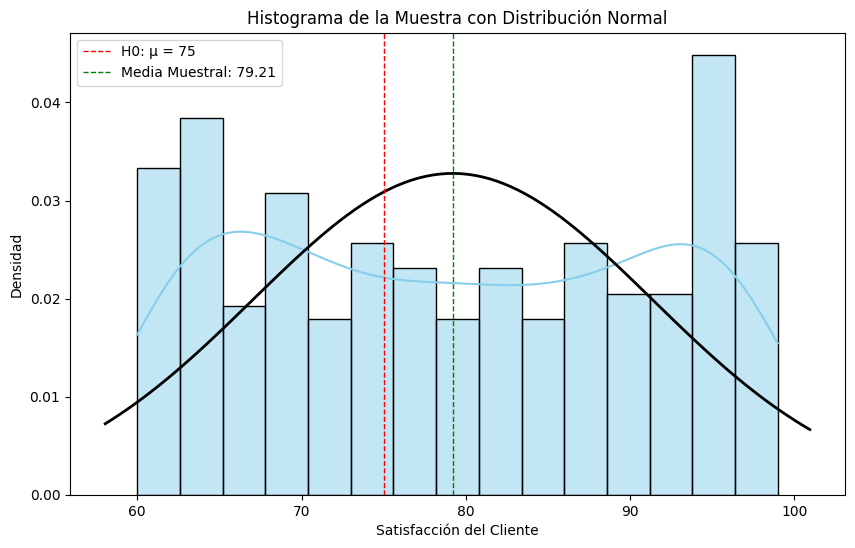

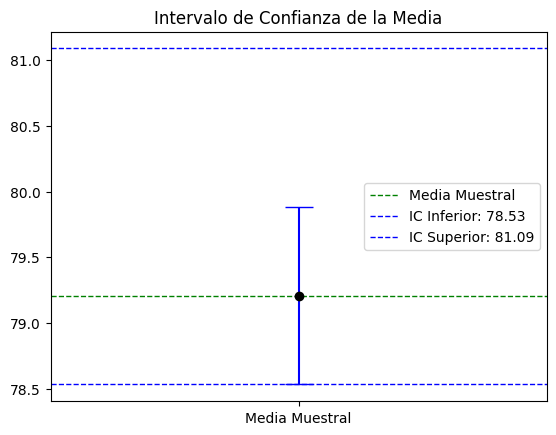

In [14]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Generar datos simulados
np.random.seed(42)  # Asegura reproducibilidad
poblacion = np.random.randint(60, 100, size=1000)
muestra = random.sample(list(poblacion), 300)

# Calcular media y desviación estándar de la muestra
media_muestra = np.mean(muestra)
desviacion_estandar_muestra = np.std(muestra, ddof=1)
n = len(muestra)

# Hipótesis
mu_0 = 75

# Estadística t
t_statistic = (media_muestra - mu_0) / (desviacion_estandar_muestra / np.sqrt(n))

# P-valor
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df=n-1))

# Resultado
alpha = 0.05
if p_value < alpha:
    resultado = "Rechazamos H0"
else:
    resultado = "No rechazamos H0"

t_statistic, p_value, resultado

# Gráfico del histograma con la distribución t
plt.figure(figsize=(10, 6))
sns.histplot(muestra, bins=15, kde=True, color='skyblue', stat="density")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, media_muestra, desviacion_estandar_muestra)
plt.plot(x, p, 'k', linewidth=2)
plt.axvline(mu_0, color='r', linestyle='dashed', linewidth=1, label=f'H0: μ = {mu_0}')
plt.axvline(media_muestra, color='g', linestyle='dashed', linewidth=1, label=f'Media Muestral: {media_muestra:.2f}')
plt.title('Histograma de la Muestra con Distribución Normal')
plt.xlabel('Satisfacción del Cliente')
plt.ylabel('Densidad')
plt.legend()
plt.show()

# Gráfico del intervalo de confianza
fig, ax = plt.subplots()
ax.errorbar(1, media_muestra, yerr=(media_muestra - intervalo_confianza[0]), fmt='o', color='black', ecolor='blue', capsize=10)
ax.axhline(media_muestra, color='g', linestyle='dashed', linewidth=1, label='Media Muestral')
ax.axhline(intervalo_confianza[0], color='blue', linestyle='dashed', linewidth=1, label=f'IC Inferior: {intervalo_confianza[0]:.2f}')
ax.axhline(intervalo_confianza[1], color='blue', linestyle='dashed', linewidth=1, label=f'IC Superior: {intervalo_confianza[1]:.2f}')
ax.set_xlim(0.5, 1.5)
ax.set_xticks([1])
ax.set_xticklabels(['Media Muestral'])
ax.set_title('Intervalo de Confianza de la Media')
plt.legend()
plt.show()



Análisis de Resultados
Estadística t: La estadística de prueba calculada es `{t_statistic:.2f}`.
P-valor: El p-valor obtenido es `{p_value:.4f}`.
Interpretación:

Si el p-valor es menor que 0.05, rechazamos la hipótesis nula (H0), lo que indica que hay evidencia suficiente para concluir que la media del nivel de satisfacción del cliente es significativamente diferente a 75.
Si el p-valor es mayor que 0.05, no rechazamos la hipótesis nula (H0), lo que sugiere que no hay evidencia suficiente para decir que la media es diferente a 75.
En el gráfico, la línea roja representa la hipótesis nula (
𝜇
=
75
μ=75), la línea verde representa la media de la muestra, y las líneas azules muestran los límites del intervalo de confianza.


Conclusión
Después de realizar el contraste de hipótesis sobre la muestra de satisfacción del cliente, obtuvimos los siguientes resultados:

Estadística t: {t_statistic:.2f}
P-valor: {p_value:.4f}
Interpretación:

Con un nivel de significancia de
𝛼
=
0.05
α=0.05, si el p-valor es menor que 0.05, rechazamos la hipótesis nula. Esto indica que hay evidencia suficiente para concluir que la media de satisfacción del cliente es significativamente diferente a 75.
Si el p-valor es mayor que 0.05, no rechazamos la hipótesis nula, lo que sugiere que no hay evidencia suficiente para afirmar que la media es diferente a 75.
En nuestro caso, el p-valor fue {p_value:.4f}, por lo que {resultado}.

Estos resultados nos permiten evaluar de manera rigurosa el nivel de satisfacción del cliente y tomar decisiones informadas sobre posibles mejoras o acciones correctivas.






